# Transfinite Interpolation

In this work, we intend to study the usage of *transfinite interpolation*.

In [1]:
# Magics
%matplotlib inline

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [3]:
def F_arc(ksi,eta):
    #angle = ksi*np.pi/2
    angle = ksi*2.0*np.pi
    
    x = 4*ksi*eta*(1-ksi)*(1-eta) + (1+eta/np.sqrt(2))*np.cos(angle)
    y = (1+eta/np.sqrt(2))*np.sin(angle)
    
    return np.array([x,y])

def F_square(ksi, eta, length=1.0, center=[0,0], n_points=10):
    s = np.linspace(0,length,n_points)
    t = np.linspace(0,length,n_points)
    X,Y = np.meshgrid(s,t)

def F_circle(ksi, eta, r=1.0, tol=1.0e-12, center=[0,0]):
    x0, y0 = center

    if np.abs(ksi) < tol:
        x = x0 + r*np.cos(-eta*np.pi/2 + np.pi/2)
        y = y0 + r*np.sin(-eta*np.pi/2 + np.pi/2)
        return np.array([x,y])  # F(0,eta)
    
    if np.abs(ksi - 1) < tol:
        x = x0 + r*np.cos(eta*np.pi/2 + np.pi)
        y = y0 + r*np.sin(eta*np.pi/2 + np.pi)
        return np.array([x,y])   # F(1,eta)
        
    if np.abs(eta) < tol:
        x = x0 + r*np.cos(ksi*np.pi/2 + np.pi/2)
        y = y0 + r*np.sin(ksi*np.pi/2 + np.pi/2)
        return np.array([x,y])   # F(ksi,0)
    
    if np.abs(eta - 1) < tol: 
        x = x0 + r*np.cos(-ksi*np.pi/2 + 2*np.pi)
        y = y0 + r*np.sin(-ksi*np.pi/2 + 2*np.pi)
        return np.array([x,y])   # F(ksi,1)
    
    print ("ERROR: Did not enter if.")
    assert False


def F_wing(ksi, eta, tol=1.0e-12):
    if np.abs(ksi) < tol:
        x = 4.0
        y = -2*eta
        return np.array([x,y])  # F(0,eta)
    
    if np.abs(ksi - 1) < tol:
        x = 4.0
        y = 2*eta
        return np.array([x,y])   # F(1,eta)
        
    if np.abs(eta) < tol:
        if ksi >= 0.0 and ksi < 0.33:
            x = 4.0 - 11.5*ksi + 7.5*ksi**2
            y = -1.125*ksi + 1.125*ksi**2
        elif ksi >= 0.33 and ksi < 0.66:
            x = 9.0 - 36*ksi + 36*ksi**2
            y = -0.75 + 1.5*ksi
        else:
            assert ksi >= 0.66 and ksi <= 1.0
            x = -3.5*ksi + 7.5*ksi**2
            y = 1.125*ksi - 1.125*ksi**2
        return np.array([x,y])   # F(ksi,0)
    
    if np.abs(eta - 1) < tol: 
        x = 4.0 - 20*ksi + 20*ksi**2
        y = -2 + 4*ksi
        return np.array([x,y])   # F(ksi,1)
    
    print ("ERROR: Did not enter if.")
    assert False
    
def F_ellipse(ksi, eta, a=1.0, b=20.0, tol=1.0e-12, center=[0,0]):
    x0, y0 = center

    if np.abs(ksi) < tol:
        x = x0 + a*np.cos(-eta*np.pi/2 + np.pi/2)
        y = y0 + b*np.sin(-eta*np.pi/2 + np.pi/2)
        return np.array([x,y])  # F(0,eta)
    
    if np.abs(ksi - 1) < tol:
        x = x0 + a*np.cos(eta*np.pi/2 + np.pi)
        y = y0 + b*np.sin(eta*np.pi/2 + np.pi)
        return np.array([x,y])   # F(1,eta)
        
    if np.abs(eta) < tol:
        x = x0 + a*np.cos(ksi*np.pi/2 + np.pi/2)
        y = y0 + b*np.sin(ksi*np.pi/2 + np.pi/2)
        return np.array([x,y])   # F(ksi,0)
    
    if np.abs(eta - 1) < tol: 
        x = x0 + a*np.cos(-ksi*np.pi/2 + 2*np.pi)
        y = y0 + b*np.sin(-ksi*np.pi/2 + 2*np.pi)
        return np.array([x,y])   # F(ksi,1)
    
    print ("ERROR: Did not enter if.")
    assert False
    
def F_ellipse_arc(ksi, eta, a=3.0, b=1.0, tol=1.0e-12, center=[0,0]):
    x0, y0 = center

    if np.abs(ksi) < tol:
        x = ksi * a
        y = eta * b
        return np.array([x,y])  # F(0,eta)
    
    if np.abs(ksi - 1) < tol:
        x = x0 + a*np.cos(eta*np.pi/4)
        y = y0 + b*np.sin(eta*np.pi/4)
        return np.array([x,y])   # F(1,eta)
        
    if np.abs(eta) < tol:
        x = ksi * a
        y = eta * b
        return np.array([x,y])   # F(ksi,0)
    
    if np.abs(eta - 1) < tol: 
        x = x0 + a*np.cos(-ksi*np.pi/4 + np.pi/2)
        y = y0 + b*np.sin(-ksi*np.pi/4 + np.pi/2)
        return np.array([x,y])   # F(ksi,1)
    
    print ("ERROR: Did not enter if.")
    assert False

A tranfinite interpolation is defined by

$$
\begin{align} 
\vec{S}(\xi, \eta) &= (1-\xi) \vec{F} (0,\eta) + \xi\vec{F}(1,\eta) + (1-\eta) \vec{F} (\xi,0) + \eta \vec{F}(\xi,1) \\
                   &- \left[(1-\xi)(1-\eta) \vec{F}(0,0) + (1-\xi)\eta \vec{F}(0,1) + \xi(1-\eta)\vec{F}(1,0) + \xi\eta \vec{F}(1,1)\right]
\end{align}
$$
Or in python code

In [4]:
def TranfiniteInterpolation(ksi, eta, F):
    return (1-ksi)*F(0,eta) + ksi*F(1,eta) + (1-eta)*F(ksi,0) + eta*F(ksi,1) \
    - (1-ksi)*(1-eta)*F(0,0) - (1-ksi)*eta*F(0,1) - ksi*(1-eta)*F(1,0) - ksi*eta*F(1,1)    

The method below will use the shape functions in a unit square in $[0,1]\times[0,1]$ to interpolate the `node_values` in the $(\xi,\eta)$ position.

In [5]:
def InterpolateQuad(ksi, eta, node_values):
    shape_func = np.array([
        (1 - ksi)*(1 - eta),
        ksi*(1 - eta),
        ksi*eta,
        eta*(1 - ksi)
        ])
    
    value = 0.0
    
    for node_value, N in zip(node_values, shape_func):
        value += N*node_value
        
    return value

Now let's generate a square domain from $(\xi,\eta)\rightarrow[0,1]\times[0,1]$.

In [6]:
# First choose which map you want, e,g, arc, wing or circle
#F = F_arc
#F = F_wing
#F = F_circle
F = F_ellipse_arc
n_points = 5

n_points_ksi = n_points
n_points_eta = n_points

s = np.linspace(0,1,n_points_ksi)
t = np.linspace(0,1,n_points_eta)
X,Y = np.meshgrid(s,t)

P = np.array([F(0,0),F(0,1),F(1,0),F(1,1)])

scat = []
Z = np.zeros((n_points_ksi, n_points_eta))
X_mapped, Y_mapped = np.zeros((n_points_ksi, n_points_eta)), np.zeros((n_points_ksi, n_points_eta))

I = np.eye(4,4)
N1, N2, N3, N4 = I[0:4]

node_values = N1

for i, ksi in enumerate(s):
    for j, eta in enumerate(t):
        x,y = TranfiniteInterpolation(ksi, eta, F)       
        scat.append([x, y])  
        X_mapped[i,j] = x
        Y_mapped[i,j] = y
        Z[i,j] = InterpolateQuad(ksi, eta, node_values)

scat = np.array(scat)

Let's view the results:

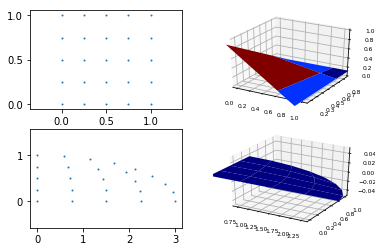

In [7]:
# Plot results
plt.close(1)
fig = plt.figure(1)

plt.subplot(221)
plt.scatter(X, Y, s=1)
plt.axis('equal')

plt.subplot(223)
#plt.scatter(F(X,Y)[0],F(X,Y)[1], s=1)
plt.scatter(scat[:,0], scat[:,1], s=1)
plt.axis('equal')

ax = fig.add_subplot(222, projection='3d')
surf = ax.plot_surface(X, Y, Z.T, cmap='jet', rstride=3, cstride=3)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.axis('equal')

ax = fig.add_subplot(224, projection='3d')
surf = ax.plot_surface(X_mapped, Y_mapped , 0 * Z, cmap='jet', rstride=1, cstride=1)
#surf = ax.plot_surface(X_mapped, Y_mapped , Z, cmap='jet', rstride=3, cstride=3)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.axis('equal')

plt.show()

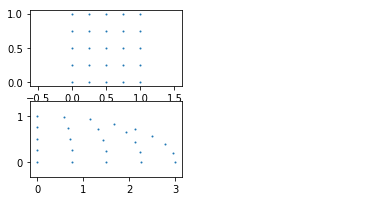

In [8]:
# Plot results
plt.close(1)
fig = plt.figure(1)

plt.subplot(221)
plt.scatter(X, Y, s=1)
plt.axis('equal')

plt.subplot(223)
#plt.scatter(F(X,Y)[0],F(X,Y)[1], s=1)
plt.scatter(scat[:,0], scat[:,1], s=1)
plt.axis('equal')

ax = fig.add_subplot(222, projection='3d')
surf = ax.plot_surface(X, Y , (0 * Z).T, cmap='pink_r', rstride=1, cstride=1)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.axis('equal')
ax.view_init(elev=90, azim=-90)
ax.set_axis_off()

ax = fig.add_subplot(224, projection='3d')
surf = ax.plot_surface(X_mapped, Y_mapped , (0 * Z), cmap='pink_r', rstride=1, cstride=1)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.axis('equal')
ax.view_init(elev=90, azim=-90)
ax.set_axis_off()
plt.subplots_adjust(bottom=0.3)
plt.show()

$$
\begin{align} 
\vec{S}(\xi, \eta) &= (1-\xi) \vec{F} (0,\eta) + \xi\vec{F}(1,\eta) + (1-\eta) \vec{F} (\xi,0) + \eta \vec{F}(\xi,1) \\
                   &- \left[(1-\xi)(1-\eta) \vec{F}(0,0) + (1-\xi)\eta \vec{F}(0,1) + \xi(1-\eta)\vec{F}(1,0) + \xi\eta \vec{F}(1,1)\right]
\end{align}
$$

In [9]:
def Blend_1D1( r, s, x00, x01, x10, x11, xr0, xr1, x0s, x1s):
    '''  
    Extends scalar data along the boundary into a square.
    
    Diagram:

    01-----r1-----11
     |      .      |
     |      .      |
    0s.....rs.....1s
     |      .      |
     |      .      |
    00-----r0-----10

    Reference:
    William Gordon, Charles A Hall,
    Construction of Curvilinear Coordinate Systems and Application to
    Mesh Generation,
    International Journal of Numerical Methods in Engineering,
    Volume 7, pages 461-477, 1973.

    Joe Thompson, Bharat Soni, Nigel Weatherill,
    Handbook of Grid Generation,
    CRC Press,
    1999.
    
    :param double r,s
        The coordinates where an interpolated value is desired.
    :param double X00, X01, X10, X11
        The data values at the corners.
    :param double XR0, XR1, X0S, X1S
        The data values at points along the edges.
        
    :return the interpolated data value at (R,S).
    '''
    return (
    - ( 1.0 - r ) * ( 1.0 - s ) * x00
    + ( 1.0 - r )               * x0s
    - ( 1.0 - r ) *         s   * x01
    +               ( 1.0 - s ) * xr0
    +                       s   * xr1
    -         r   * ( 1.0 - s ) * x10
    +         r                 * x1s
    -         r   *         s   * x11
    )

Now let's try to define a **3D** transfinite interpolation:

$$
\begin{align} 
\vec{S}(\xi,\eta,\zeta) = 
  (1-\xi)(1-\eta)(1-\zeta)&\vec{F}(0,0,0)       &-(1-\xi)(1-\eta) &\vec{F}(0,0,\zeta)   &+(1-\xi) (1-\eta)   \zeta &\vec{F}(0,0,1)&\\ 
- (1-\xi)        (1-\zeta)&\vec{F}(0,\eta,0)    &+(1-\xi          &\vec{F}(0,\eta,\zeta)&-(1-\xi)            \zeta &\vec{F}(0,\eta,1)&\\
+ (1-\xi)   \eta (1-\zeta)&\vec{F}(0,1,0)       &-(1-\xi)   \eta  &\vec{F}(0,1,\zeta)   &+(1-\xi)    \eta    \zeta &\vec{F}(0,1,1)&\\
-        (1-\eta)(1-\zeta)&\vec{F}(\xi,0,0)     &+       (1-\eta) &\vec{F}(\xi,0,\zeta) &-        (1-\eta)   \zeta &\vec{F}(\xi,0,1)&\\ 
+                (1-\zeta)&\vec{F}(\xi,\eta,0)  &+           \zeta&\vec{F}(\xi,\eta,1)  &-           \eta (1-\zeta)&\vec{F}(\xi,1,0)&\\
+           \eta          &\vec{F}(\xi,1,\zeta) &-           \eta\zeta&\vec{F}(\xi,1,1) &+   \xi  (1-\eta)(1-\zeta)&\vec{F}(1,0,0)&\\
-    \xi (1-\eta)         &\vec{F}(1,0,\zeta)   &+   \xi (1-\eta)\zeta&\vec{F}(1,0,1)   &-   \xi          (1-\zeta)&\vec{F}(1,\eta,0)&\\
+    \xi                  &\vec{F}(1,\eta,\zeta)&-   \xi         \zeta&\vec{F}(1,\eta,1)&+   \xi     \eta (1-\zeta)&\vec{F}(1,1,0)&\\
-    \xi    \eta          &\vec{F}(1,1,\zeta)   &+   \xi    \eta \zeta&\vec{F}(1,1,1)&       
\end{align}
$$

In [10]:
def Blend_2D1( 
    r, s, t, 
    x000, x001, x010, x011, x100, x101, x110, x111,
    xr00, xr01, xr10, xr11, x0s0, x0s1, x1s0, x1s1,
    x00t, x01t, x10t, x11t, x0st, x1st, xr0t, xr1t, xrs0, xrs1
    ):
    '''
    BLEND_2D1 extends scalar data along the surface into a cube.
    
    Diagram:

    010-----r10-----110    011-----r11-----111
      |       .       |      |       .       |
      |       .       |      |       .       |
    0s0.....rs0.....1s0    0s1.....rs1.....1s1     S
      |       .       |      |       .       |     |
      |       .       |      |       .       |     |
    000-----r00-----100    001-----r01-----101     +----R
       BOTTOM                      TOP

    011-----0s1-----001    111-----1s1-----101
      |       .       |      |       .       |
      |       .       |      |       .       |
    01t.....0st.....00t    11t.....1st.....10t          T
      |       .       |      |       .       |          |
      |       .       |      |       .       |          |
    010-----0s0-----000    110-----1s0-----100     S----+
       LEFT                       RIGHT

    001-----r01-----101    011-----r11-----111
      |       .       |      |       .       |
      |       .       |      |       .       |
    00t.....r0t.....100    01t.....r1t.....11t     T
      |       .       |      |       .       |     |
      |       .       |      |       .       |     |
    000-----r00-----100    010-----r10-----110     +----R
       FRONT                       BACK


    Reference:

    William Gordon, Charles A Hall,
    Construction of Curvilinear Coordinate Systems and Application to
    Mesh Generation,
    International Journal of Numerical Methods in Engineering,
    Volume 7, pages 461-477, 1973.

    Joe Thompson, Bharat Soni, Nigel Weatherill,
    Handbook of Grid Generation,
    CRC Press,
    1999.

    :param double R, S, T
        The coordinates where an interpolated value is desired.

    :param double X000, X001, X010, X011, X100, X101, X110, X111
        The data values at the corners.

    :param double XR00, XR01, XR10, XR11, X0S0, X0S1, X1S0, X1S1, X00T, X01T, X10T, X11T
        The data values at points along the edges.

    Input, double X0ST, X1ST, XR0T, XR1T, XRS0, XRS1, the data values
    at points on the faces.

    :return double 
        The interpolated data value at (R,S,T).
    '''
    
    return (
       + ( 1.0 - r ) * ( 1.0 - s ) * ( 1.0 - t ) * x000
       - ( 1.0 - r ) * ( 1.0 - s )               * x00t
       + ( 1.0 - r ) * ( 1.0 - s ) *         t   * x001
       - ( 1.0 - r )               * ( 1.0 - t ) * x0s0
       + ( 1.0 - r )                             * x0st
       - ( 1.0 - r )               *         t   * x0s1
       + ( 1.0 - r ) *         s   * ( 1.0 - t ) * x010
       - ( 1.0 - r ) *         s                 * x01t
       + ( 1.0 - r ) *         s   *         t   * x011
       -               ( 1.0 - s ) * ( 1.0 - t ) * xr00
       +               ( 1.0 - s )               * xr0t
       -               ( 1.0 - s ) *         t   * xr01
       +                             ( 1.0 - t ) * xrs0
       +                                     t   * xrs1
       -                       s   * ( 1.0 - t ) * xr10
       +                       s                 * xr1t
       -                       s   *         t   * xr11
       +         r   * ( 1.0 - s ) * ( 1.0 - t ) * x100
       -         r   * ( 1.0 - s )               * x10t
       +         r   * ( 1.0 - s ) *         t   * x101
       -         r                 * ( 1.0 - t ) * x1s0
       +         r                               * x1st
       -         r                 *         t   * x1s1
       +         r   *         s   * ( 1.0 - t ) * x110
       -         r   *         s                 * x11t
       +         r   *         s   *         t   * x111
    )

In [11]:
def Blend_rst_1DN(r, s, t, bound_rst):
    '''
    Extends vector data on edges into a cube.

    Diagram:

    010-----r10-----110    011-----r11-----111
      |       .       |      |       .       |
      |       .       |      |       .       |
    0s0.....rs0.....1s0    0s1.....rs1.....1s1     S
      |       .       |      |       .       |     |
      |       .       |      |       .       |     |
    000-----r00-----100    001-----r01-----101     +----R
       BOTTOM                      TOP

    011-----0s1-----001    111-----1s1-----101
      |       .       |      |       .       |
      |       .       |      |       .       |
    01t.....0st.....00t    11t.....1st.....10t          T
      |       .       |      |       .       |          |
      |       .       |      |       .       |          |
    010-----0s0-----000    110-----1s0-----100     S----+
       LEFT                       RIGHT

    001-----r01-----101    011-----r11-----111
      |       .       |      |       .       |
      |       .       |      |       .       |
    00t.....r0t.....100    01t.....r1t.....11t     T
      |       .       |      |       .       |     |
      |       .       |      |       .       |     |
    000-----r00-----100    010-----r10-----110     +----R
       FRONT                       BACK


    Reference:

    William Gordon, Charles A Hall,
    Construction of Curvilinear Coordinate Systems and Application to
    Mesh Generation,
    International Journal of Numerical Methods in Engineering,
    Volume 7, pages 461-477, 1973.

    Joe Thompson, Bharat Soni, Nigel Weatherill,
    Handbook of Grid Generation,
    CRC Press,
    1999.

    :param double r, s, t
        The (r,s,t) coordinates of the point to be evaluated.

    :return double X(n)
        The interpolated value at the point (r,s,t).

    :param method bound_rst
        A subroutine which is given (r,s,t) coordinates, it returns the value 
        at that point. "bound_rst" will only be called for "edges", that is, 
        for values (r,s,t) where at least two of r, s and t are either 0.0 or 
        1.0. "bound_rst" has the form:
        
            x = bound_rst(r, s, t)
    '''
    #  Get the I-th coordinate component at the corners.
    x000 = bound_rst(0.0, 0.0, 0.0)
    x001 = bound_rst(0.0, 0.0, 1.0)
    x010 = bound_rst(0.0, 1.0, 0.0)
    x011 = bound_rst(0.0, 1.0, 1.0)
    x100 = bound_rst(1.0, 0.0, 0.0) 
    x101 = bound_rst(1.0, 0.0, 1.0)
    x110 = bound_rst(1.0, 1.0, 0.0)
    x111 = bound_rst(1.0, 1.0, 1.0)

    #  Get the I-th coordinate component at the edges.
    xr00 = bound_rst(r, 0.0, 0.0)
    xr01 = bound_rst(r, 0.0, 1.0)
    xr10 = bound_rst(r, 1.0, 0.0)
    xr11 = bound_rst(r, 1.0, 1.0)

    x0s0 = bound_rst(0.0, s, 0.0)
    x0s1 = bound_rst(0.0, s, 1.0)
    x1s0 = bound_rst(1.0, s, 0.0)
    x1s1 = bound_rst(1.0, s, 1.0)

    x00t = bound_rst(0.0, 0.0, t)
    x01t = bound_rst(0.0, 1.0, t)
    x10t = bound_rst(1.0, 0.0, t)
    x11t = bound_rst(1.0, 1.0, t)

    #  Interpolate the I-th component on the faces.
    x0st = Blend_1D1(s, t, x000, x001, x010, x011, x0s0, x0s1, x00t, x01t)
    x1st = Blend_1D1(s, t, x100, x101, x110, x111, x1s0, x1s1, x10t, x11t)
    xr0t = Blend_1D1(r, t, x000, x001, x100, x101, xr00, xr01, x00t, x10t)
    xr1t = Blend_1D1(r, t, x010, x011, x110, x111, xr10, xr11, x01t, x11t)    
    xrs0 = Blend_1D1(r, s, x000, x010, x100, x110, xr00, xr10, x0s0, x1s0)
    xrs1 = Blend_1D1(r, s, x001, x011, x101, x111, xr01, xr11, x0s1, x1s1)

    #  Interpolate the I-th coordinate component of the interior point.
    return Blend_2D1( 
        r, s, t, x000, x001, x010, x011, x100, x101,
        x110, x111, xr00, xr01, xr10, xr11, x0s0, x0s1, x1s0, x1s1,
        x00t, x01t, x10t, x11t, x0st, x1st, xr0t, xr1t, xrs0, xrs1
        ) 

In [12]:
# view edges
def CalculateEdges(n_points, edge_function):
    scat = []
    for zeta in [0,1]:
        for eta in [0,1]:   
            for ksi in np.linspace(0,1,n_points):
                x,y,z = Blend_rst_1DN(ksi, eta, zeta, edge_function)    
                scat.append([x,y,z])
    for zeta in np.linspace(0,1,n_points):
        for eta in [0,1]:   
            for ksi in [0,1]:
                x,y,z = Blend_rst_1DN(ksi, eta, zeta, edge_function)    
                scat.append([x,y,z])
    for zeta in [0,1]:
        for eta in np.linspace(0,1,n_points):   
            for ksi in [0,1]:
                x,y,z = Blend_rst_1DN(ksi, eta, zeta, edge_function)    
                scat.append([x,y,z])
    return np.array(scat)


# view faces
def CalculateFaces(n_points, edge_function):
    scat = []
    for zeta in [0,1]:
        for eta in np.linspace(0,1,n_points):   
            for ksi in np.linspace(0,1,n_points):
                x,y,z = Blend_rst_1DN(ksi, eta, zeta, edge_function)    
                scat.append([x,y,z])
    for zeta in np.linspace(0,1,n_points):
        for eta in [0,1]:   
            for ksi in np.linspace(0,1,n_points):
                x,y,z = Blend_rst_1DN(ksi, eta, zeta, edge_function)    
                scat.append([x,y,z])
    for zeta in np.linspace(0,1,n_points):
        for eta in np.linspace(0,1,n_points):   
            for ksi in [0,1]:
                x,y,z = Blend_rst_1DN(ksi, eta, zeta, edge_function)    
                scat.append([x,y,z])
    return np.array(scat)


# view all
def CalculateBody(n_points, edge_function):
    scat = []
    for zeta in np.linspace(0,1,n_points):
        for eta in np.linspace(0,1,n_points):   
            for ksi in np.linspace(0,1,n_points):
                x,y,z = Blend_rst_1DN(ksi, eta, zeta, edge_function)    
                scat.append([x,y,z])
    return np.array(scat)


The function below returns the edges of a round hexahedron. The full object will be achieved through the usage of transfinite interpolation using the "edge function" of the round hexahedron.

In [13]:
def F_roundhexa(ksi, eta, zeta, r = 0.3, tol=1.0e-12, center=[0.5,0.5,0.5]):
    x0, y0, z0 = center
    H = 0.5
    L = 0.9
    C1 = np.append(F_circle(0,0, r=r, center=[x0,y0]), H)
    C2 = np.append(F_circle(0,1, r=r, center=[x0,y0]), H)
    C3 = np.append(F_circle(1,0, r=r, center=[x0,y0]), H)
    C4 = np.append(F_circle(1,1, r=r, center=[x0,y0]), H)
    
    S1 = np.append(F_circle(0,0, r=L, center=[x0,y0]), 0.0)
    S2 = np.append(F_circle(0,1, r=L, center=[x0,y0]), 0.0)
    S3 = np.append(F_circle(1,0, r=L, center=[x0,y0]), 0.0)
    S4 = np.append(F_circle(1,1, r=L, center=[x0,y0]), 0.0)
    
    if np.abs(zeta-1) < tol:
        # not sure why I had to invert eta, ksi 
        # it should be ksi, eta (something to do with base vectors?)
        x,y = F_circle(eta, ksi, r=r, tol=tol, center=[x0,y0])
        z = zeta*H
        return np.array([x,y,z])
    
    if np.abs(zeta) < tol:
        P1 = F_circle(0,0, r=L, center=[x0,y0])
        P2 = F_circle(0,1, r=L, center=[x0,y0])
        P3 = F_circle(1,0, r=L, center=[x0,y0])
        P4 = F_circle(1,1, r=L, center=[x0,y0])
        node_values=np.array([P2,P1,P3,P4])  
        x, y = InterpolateQuad(ksi, eta, node_values)
        z = zeta*H
        return np.array([x,y,z])  
    
    if np.abs(ksi-1) < tol: 
        if np.abs(eta-1) < tol: 
            x,y,z = (C4 - S4)*zeta + S4            
            return np.array([x,y,z])   
    
        if np.abs(eta) < tol:
            x,y,z = (C2 - S2)*zeta + S2
            return np.array([x,y,z])
    
    if np.abs(ksi) < tol:
        if np.abs(eta-1) < tol: 
            x,y,z = (C3 - S3)*zeta + S3
            return np.array([x,y,z])   
    
        if np.abs(eta) < tol:
            x,y,z = (C1 - S1)*zeta + S1 
            return np.array([x,y,z])
    
    print ("ERROR: Did not enter if.")
    assert False

In [14]:
# From Lucci Paulo Dissertation:
def RoundHexa(ksi, eta, zeta):
    x = 0.125*(-5.2*ksi*zeta + 2.8*ksi + 1.697*(ksi*zeta + ksi)*np.cos(0.785*eta) + 1.697*(zeta + 1.0)*np.sin(0.785*ksi))
    y = 0.125*(-5.2*eta*zeta + 2.8*eta + 1.697*(eta*zeta + eta)*np.cos(0.785*ksi) + 1.697*(zeta + 1.0)*np.sin(0.785*eta))
    z = zeta
    
    return np.array([x,y,z])

def ComputeReferenceModel(n_points):
    scat = []
    for zeta in np.linspace(-1,1,n_points):
        for eta in np.linspace(-1,1,n_points):   
            for ksi in np.linspace(-1,1,n_points):
                x,y,z = RoundHexa(ksi, eta, zeta)       
                scat.append([x,y,z])
    return np.array(scat)

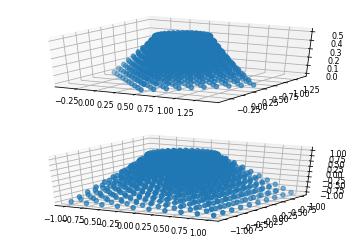

In [15]:
scat = CalculateBody(n_points=10, edge_function=F_roundhexa)
scat_ref = ComputeReferenceModel(n_points=10)

# Plot results
plt.close(1)
fig = plt.figure(1)

ax = fig.add_subplot(211, projection='3d')
surf = ax.scatter(scat[:,0], scat[:,1], scat[:,2])
ax.tick_params(axis='both', which='major', labelsize=8)

ax = fig.add_subplot(212, projection='3d')
surf = ax.scatter(scat_ref[:,0], scat_ref[:,1], scat_ref[:,2])
ax.tick_params(axis='both', which='major', labelsize=8)

plt.show()